# Regression Challenge


## Data Exploration

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler


In [2]:
#Loading dataset
data = pd.read_csv("Hyderabad.csv")
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
#Data Summary
display(data.describe().T)
display(data.info())

,count,mean,std,min,25%,50%,75%,max
Price,2518.0,9.818380e+06,8.777113e+06,2000000.0,4760000.0,7754000.0,10900000.0,165000000.0
Area,2518.0,1.644571e+03,7.462570e+02,500.0,1160.0,1500.0,1829.0,9400.0
No. of Bedrooms,2518.0,2.623511e+00,6.873302e-01,1.0,2.0,3.0,3.0,8.0
Resale,2518.0,2.275616e-01,4.193413e-01,0.0,0.0,0.0,0.0,1.0
MaintenanceStaff,2518.0,4.126291e-01,1.626445e+00,0.0,0.0,0.0,0.0,9.0
Gymnasium,2518.0,7.398729e-01,1.611024e+00,0.0,0.0,0.0,1.0,9.0
SwimmingPool,2518.0,7.096902e-01,1.615231e+00,0.0,0.0,0.0,1.0,9.0
LandscapedGardens,2518.0,6.191422e-01,1.624426e+00,0.0,0.0,0.0,1.0,9.0
JoggingTrack,2518.0,5.599682e-01,1.627686e+00,0.0,0.0,0.0,1.0,9.0
RainWaterHarvesting,2518.0,6.064337e-01,1.625308e+00,0.0,0.0,0.0,1.0,9.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

None

The datatypes are correct but it seems that there are some outliers

### Checking for Null values

In [4]:
data.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


There are no missing values

### Dealing with Duplicated Data

In [5]:
print("Number of duplicate rows:", data.duplicated(subset=None, keep='first').sum())

Number of duplicate rows: 520


In [6]:
# Drop duplicates
data.drop_duplicates(subset=None, keep='first',inplace=True)

### View the histogram of all numerical features

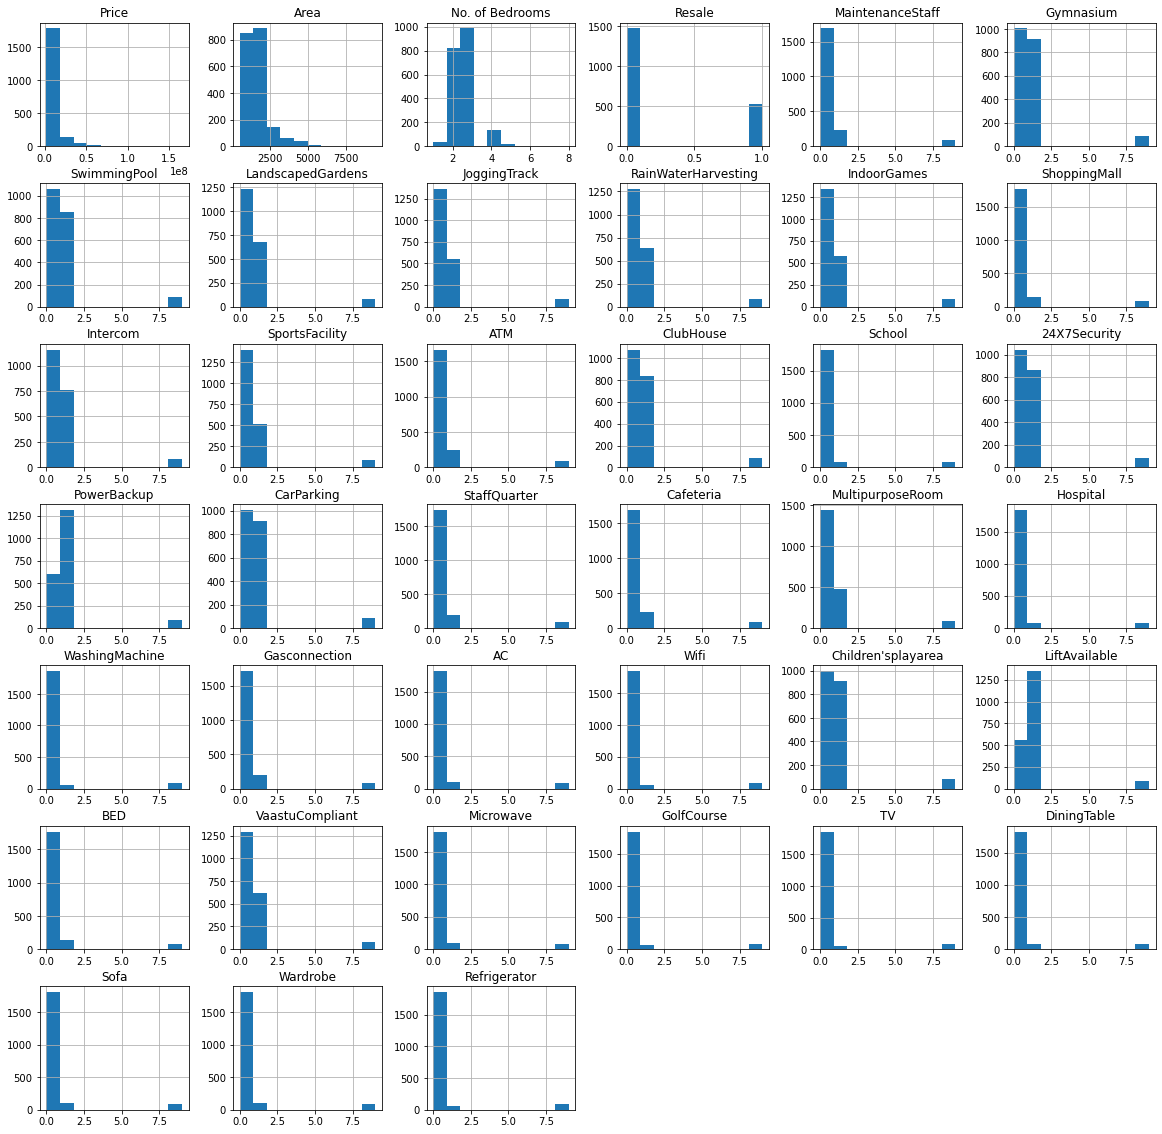

In [7]:
_= data.hist(figsize=(20,20))

The records with values of 9 seems to be inaccurate, so we will invistegate them

In [8]:
data.loc[data['Gymnasium'] == 9]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
2434,7500000,1100,Attapur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2435,8105000,1725,Kompally,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2436,6277000,1435,Kukatpally,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2437,7019000,1090,Kukatpally,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2438,4800000,1230,Kukatpally,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


These rows are totally inaccurate, we will drop them

In [9]:
data.drop(data[(data['Gymnasium'] == 9) & (data['SwimmingPool'] == 9) & (data['LandscapedGardens'] == 9)].index, inplace = True)

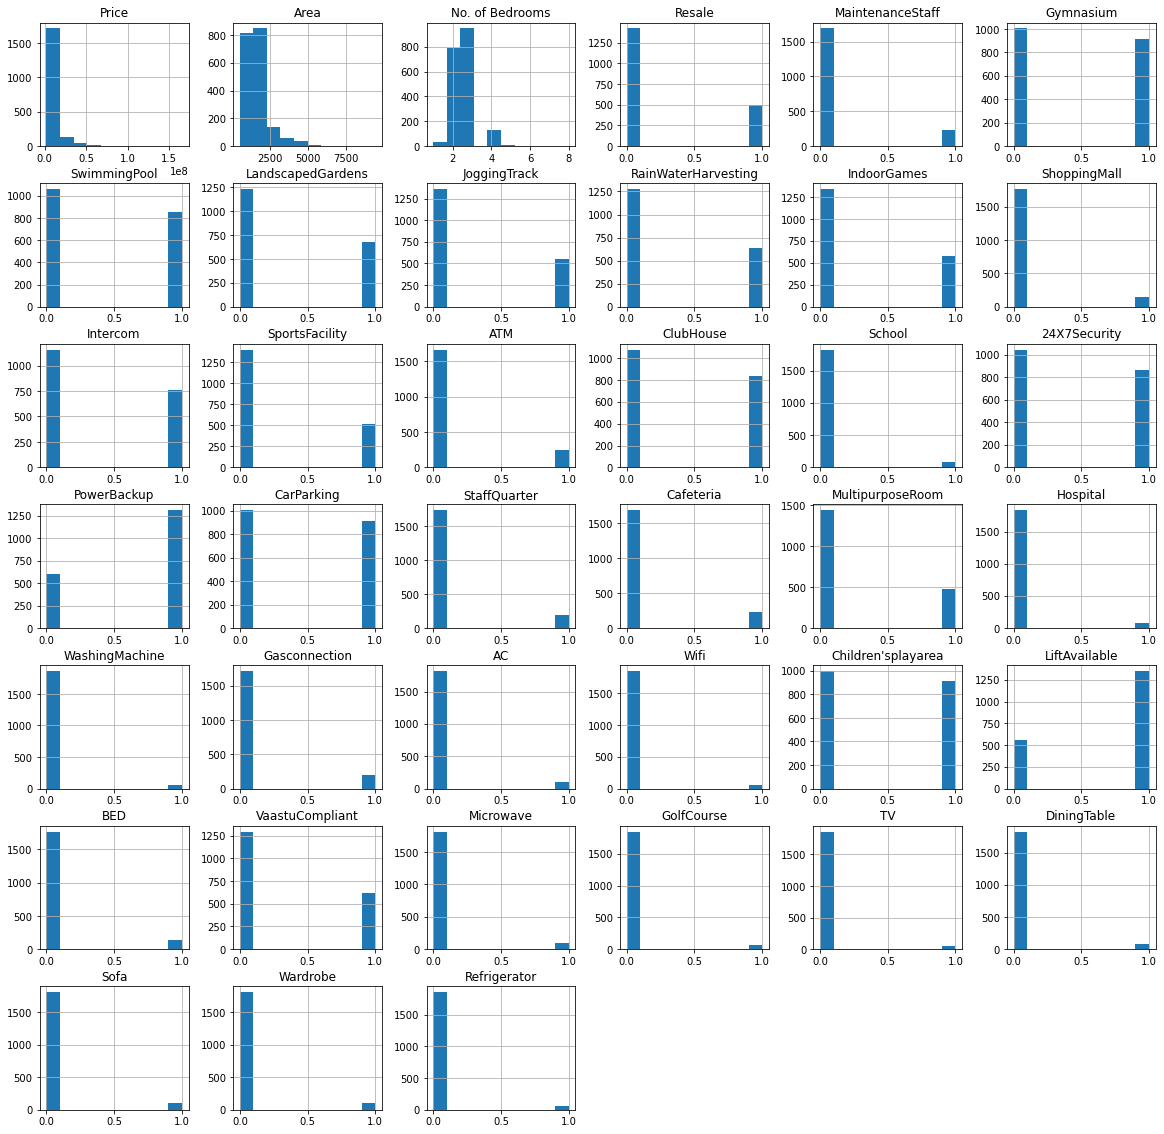

In [10]:
_=data.hist(figsize=(20,20))

When we removed the records with value 9 in only 3 features, we removed the records with 9 value in all the features that contained 0,1,9. That assures that we these rows were inaccurate.

### View some fetures with price

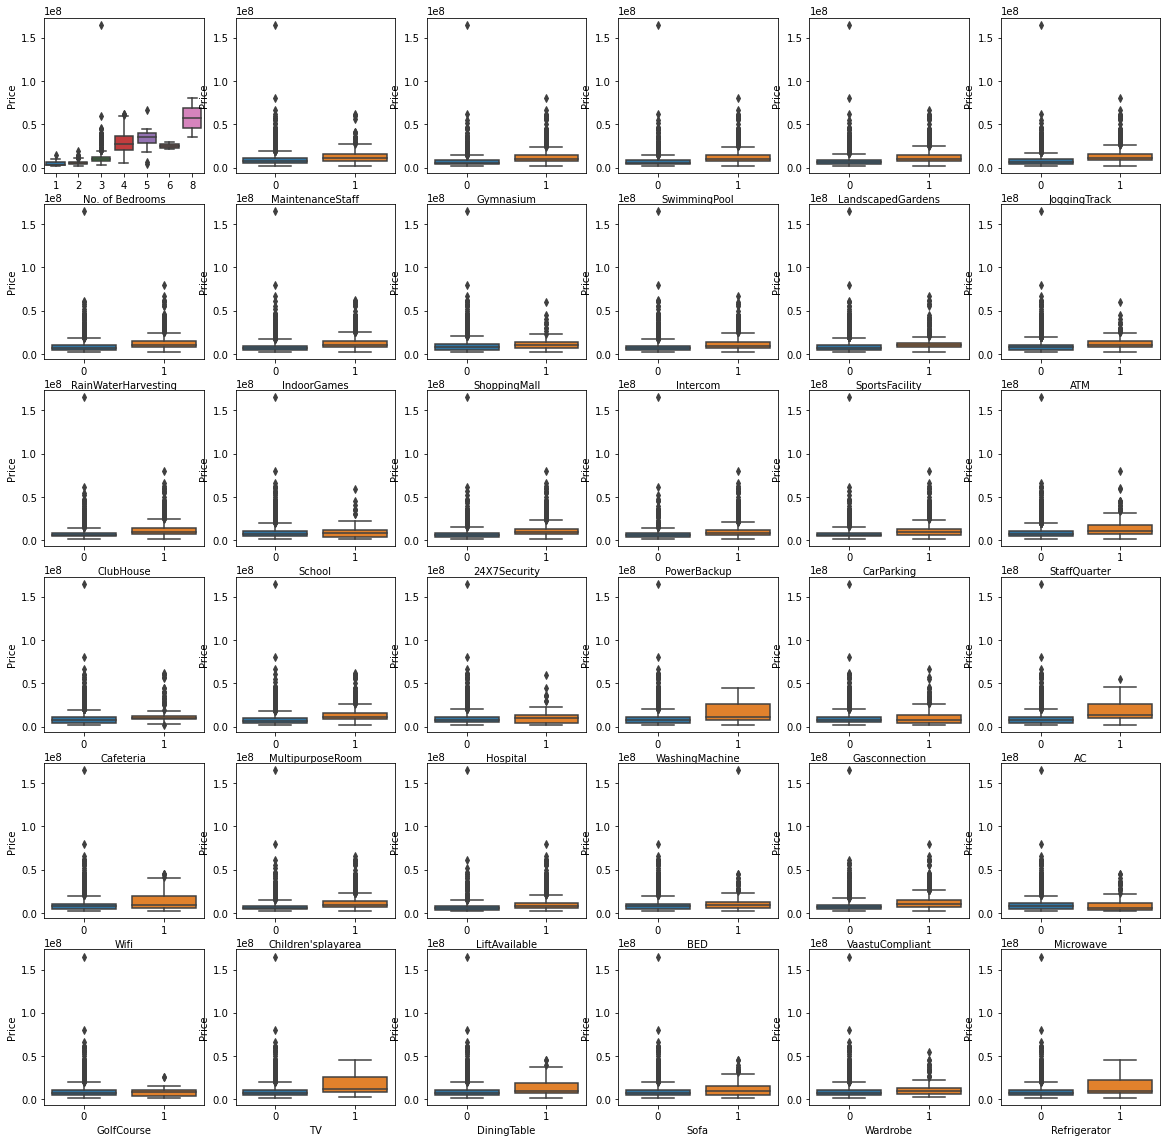

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(6, 6, 1)
_ = sns.boxplot(x= 'No. of Bedrooms', y='Price', data=data)

plt.subplot(6, 6,2)
_ = sns.boxplot(x= 'MaintenanceStaff', y='Price', data= data)

plt.subplot(6, 6, 3)
_ = sns.boxplot(x= 'Gymnasium', y='Price', data= data)

plt.subplot(6, 6, 4)
_ = sns.boxplot(x= 'SwimmingPool', y='Price', data= data)

plt.subplot(6, 6, 5)
_ = sns.boxplot(x= 'LandscapedGardens', y='Price', data=data)

plt.subplot(6, 6,6)
_ = sns.boxplot(x= 'JoggingTrack', y='Price', data=data)

plt.subplot(6, 6,7)
_ = sns.boxplot(x= 'RainWaterHarvesting', y='Price', data=data)

plt.subplot(6, 6,8)
_ = sns.boxplot(x= 'IndoorGames', y='Price', data=data)

plt.subplot(6, 6, 9)
_ = sns.boxplot(x= 'ShoppingMall', y='Price', data=data)

plt.subplot(6, 6, 10)
_ = sns.boxplot(x= 'Intercom', y='Price', data=data)

plt.subplot(6, 6, 11)
_ = sns.boxplot(x= 'SportsFacility', y='Price', data=data)

plt.subplot(6, 6, 12)
_ = sns.boxplot(x= 'ATM', y='Price', data=data)

plt.subplot(6, 6, 13)
_ = sns.boxplot(x= 'ClubHouse', y='Price', data=data)

plt.subplot(6, 6, 14)
_ = sns.boxplot(x= 'School', y='Price', data=data)

plt.subplot(6, 6,15)
_ = sns.boxplot(x= '24X7Security', y='Price', data=data)

plt.subplot(6, 6, 16)
_ = sns.boxplot(x= 'PowerBackup', y='Price', data=data)

plt.subplot(6, 6, 17)
_ = sns.boxplot(x= 'CarParking', y='Price', data=data)

plt.subplot(6, 6, 18)
_ = sns.boxplot(x= 'StaffQuarter', y='Price', data=data)

plt.subplot(6, 6, 19)
_ = sns.boxplot(x= 'Cafeteria', y='Price', data=data)

plt.subplot(6, 6, 20)
_ = sns.boxplot(x= 'MultipurposeRoom', y='Price', data=data)

plt.subplot(6, 6, 21)
_ = sns.boxplot(x= 'Hospital', y='Price', data=data)

plt.subplot(6, 6, 22)
_ = sns.boxplot(x= 'WashingMachine', y='Price', data=data)

plt.subplot(6, 6, 23)
_ = sns.boxplot(x= 'Gasconnection', y='Price', data=data)

plt.subplot(6, 6, 24)
_ = sns.boxplot(x= 'AC', y='Price', data=data)

plt.subplot(6, 6, 25)
_ = sns.boxplot(x= 'Wifi', y='Price', data=data)

plt.subplot(6, 6, 26)
_ = sns.boxplot(x= "Children'splayarea", y='Price', data=data)

plt.subplot(6, 6, 27)
_ = sns.boxplot(x= 'LiftAvailable', y='Price', data=data)

plt.subplot(6, 6, 28)
_ = sns.boxplot(x= 'BED', y='Price', data=data)

plt.subplot(6, 6, 29)
_ = sns.boxplot(x= 'VaastuCompliant', y='Price', data=data)

plt.subplot(6, 6, 30)
_ = sns.boxplot(x= 'Microwave', y='Price', data=data)

plt.subplot(6, 6, 31)
_ = sns.boxplot(x= 'GolfCourse', y='Price', data=data)

plt.subplot(6, 6, 32)
_ = sns.boxplot(x= 'TV', y='Price', data=data)

plt.subplot(6, 6, 33)
_ = sns.boxplot(x= 'DiningTable', y='Price', data=data)

plt.subplot(6, 6, 34)
_ = sns.boxplot(x= 'Sofa', y='Price', data=data)

plt.subplot(6, 6, 35)
_ = sns.boxplot(x= 'Wardrobe', y='Price', data=data)

plt.subplot(6, 6, 36)
_ = sns.boxplot(x= 'Refrigerator', y='Price', data=data)

# Preprocessing

### View Pearson linear Correlation

<AxesSubplot:>

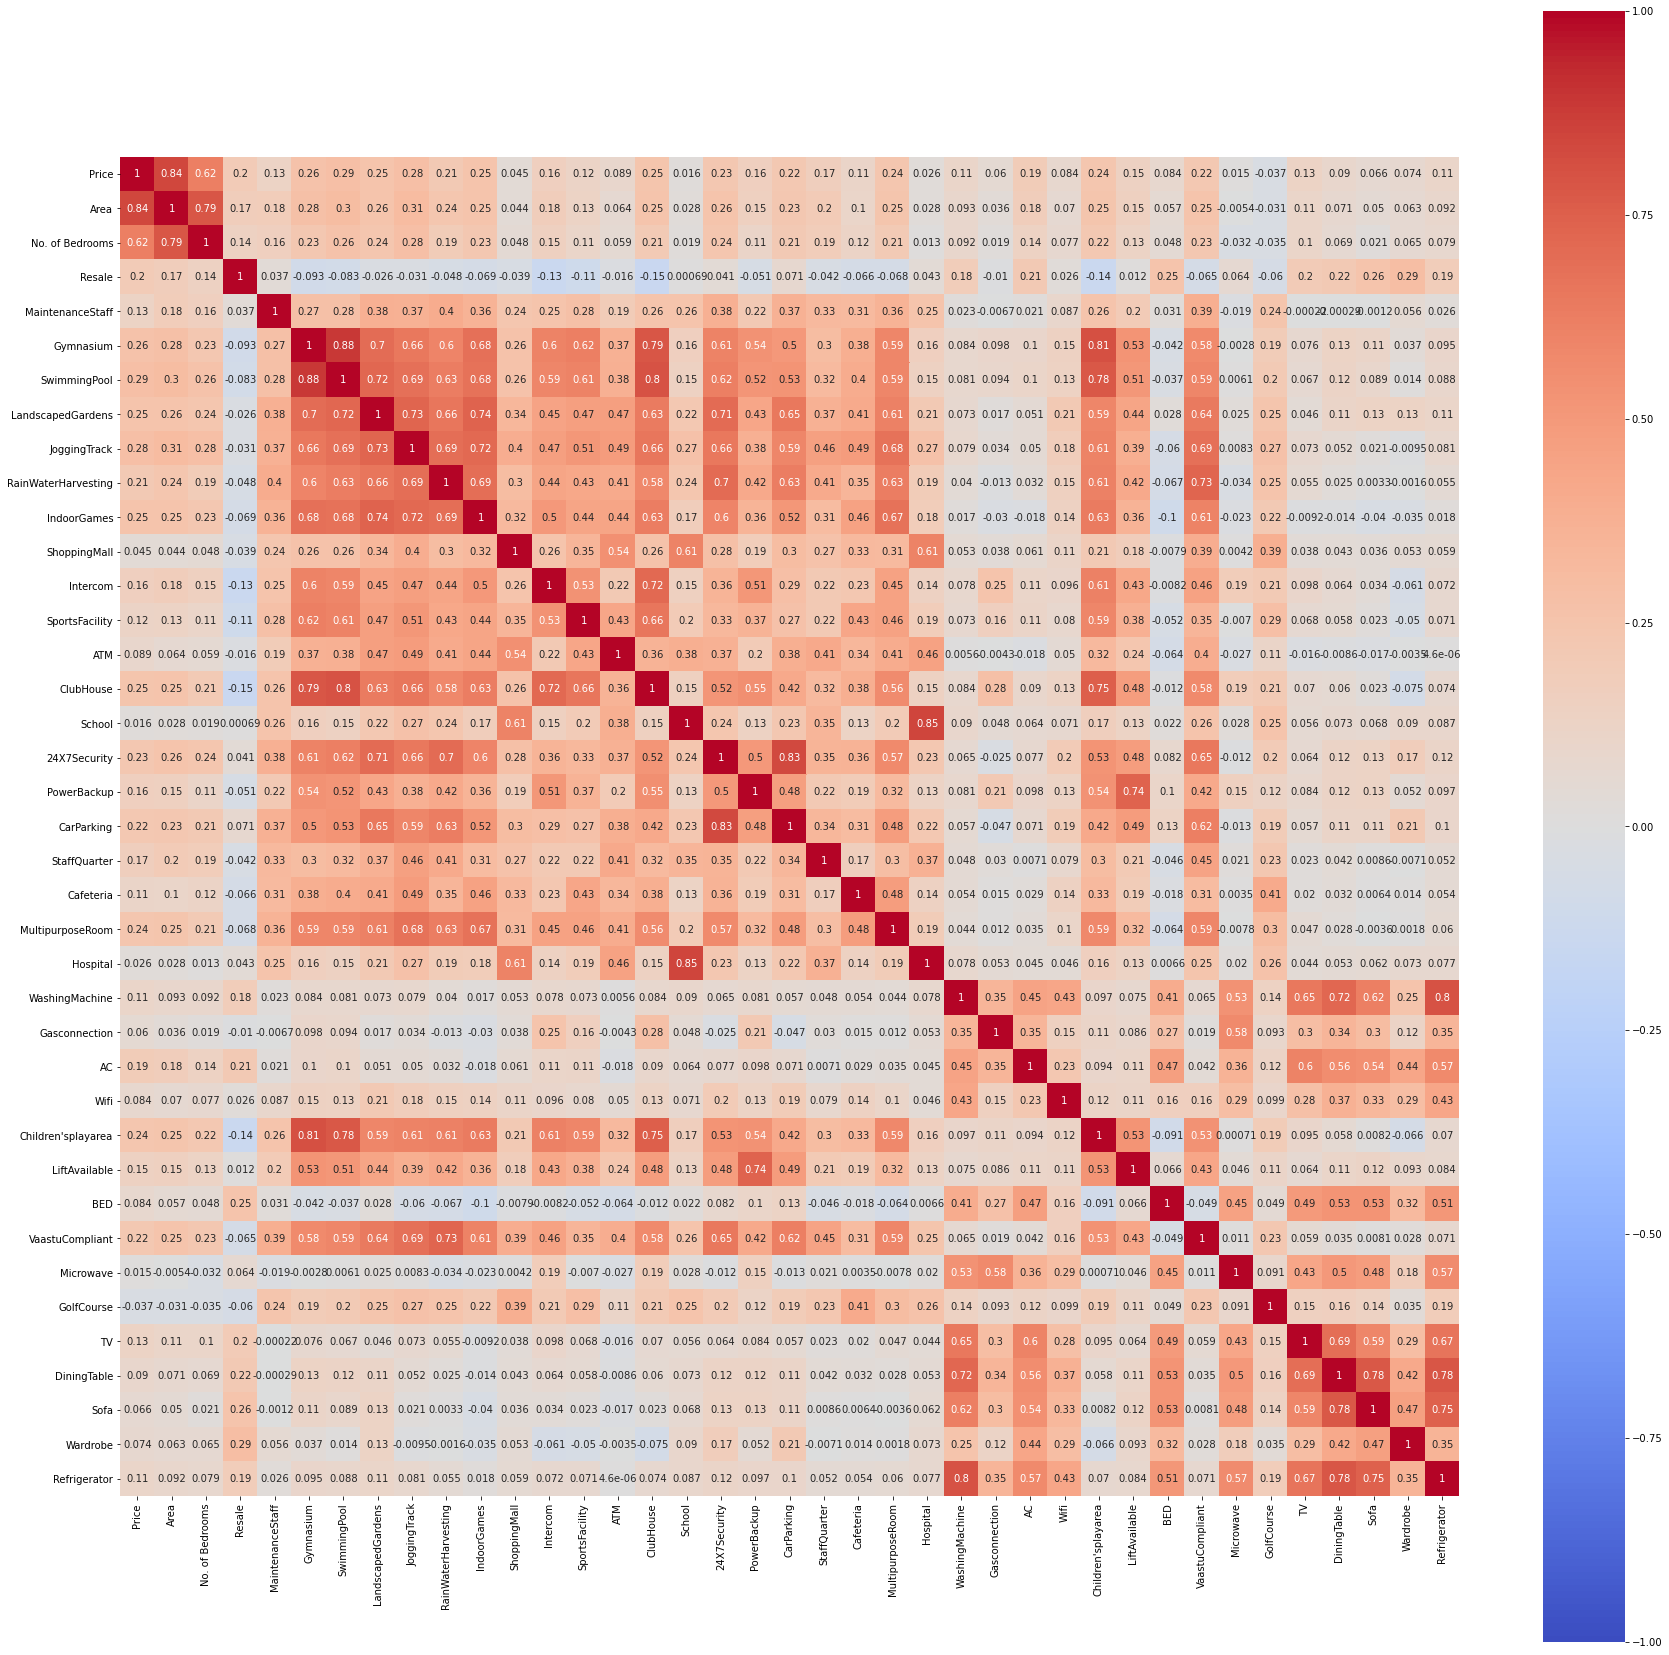

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(data.drop(columns=['Location']).corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

We will sum binary features into one feature to decrease the dimensionality of the data

In [13]:
df1=data.copy()
df1['FeaturesTotal']= df1.iloc[:, 5:].sum(axis=1)
df1.drop(df1.iloc[:, 5:-1], inplace = True, axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2433
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            1914 non-null   int64 
 1   Area             1914 non-null   int64 
 2   Location         1914 non-null   object
 3   No. of Bedrooms  1914 non-null   int64 
 4   Resale           1914 non-null   int64 
 5   FeaturesTotal    1914 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 169.2+ KB


## Separate 20% of data for final testing on new unseen data

In [14]:
train_data, test_data = train_test_split(data, test_size=0.2 , random_state=42)
display(train_data.shape)

(1531, 40)

**-->** 504 observations where separated for final testing and 2014 to be trained

### Dealing with Price Feature

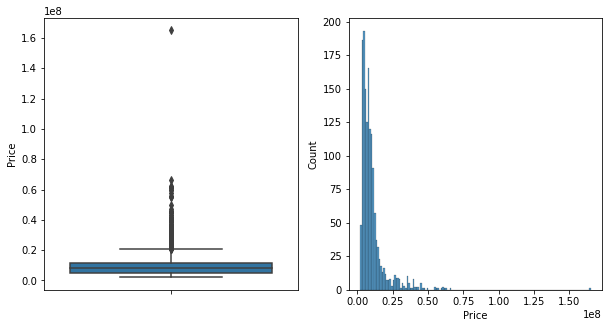

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Price', data= train_data)

plt.subplot(1, 2, 2)
_ = sns.histplot(x='Price', data=train_data)

There are some outliers in the prices

**1- Try removing outliers in Price by IQR**

In [16]:
# Q1 = train_data['Price'].quantile(0.25)
# Q3 = train_data['Price'].quantile(0.75)
# IQR = Q3 - Q1    
# filter_price = (train_data['Price'] >= Q1 - 2.5 * IQR) & (train_data['Price'] <= Q3 + 2.5 *IQR)   # 2.5 was better than 1.5
# train_data = train_data.loc[filter_price] 


# ### plot boxplot and histogram after removing outliers above and below 2.5 IQR
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# _ = sns.boxplot(y='Price', data= train_data)

# plt.subplot(1, 2, 2)
# _ = sns.histplot(x='Price', data= train_data)

# display(train_data)  # 97 row removed

**2- Try removing outliers in Price by setting threshold value**

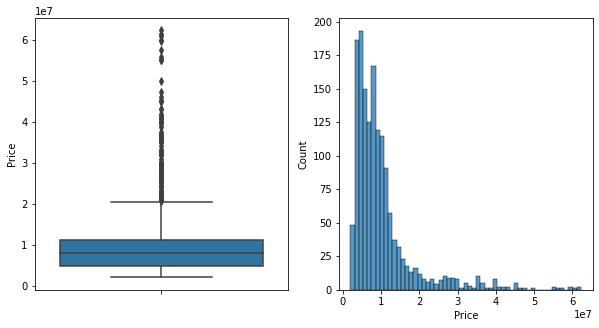

In [17]:
# Drop observations greater than some value
train_data = train_data[train_data['Price'] <= 0.66*1e8]

### plot boxplot and histogram after any prices above 70000000
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Price', data= train_data)

plt.subplot(1, 2, 2)
_ = sns.histplot(x='Price', data= train_data)

**3- Try removing outliers in Price by log transform**

In [18]:
# data['Price'] = np.log1p(data['Price'])

# plt.figure(figsize=(10,5))
# plt.subplot(1, 2, 1)
# _ = sns.boxplot(y='Price', data= data)

# plt.subplot(1, 2, 2)
# _ = sns.histplot(x='Price', data=data)

**4- Try removing outliers in Price by std method**

In [19]:
# # calculate summary statistics
# data_mean, data_std = data['Price'].mean(), data['Price'].std()
# # identify outliers
# cut_off = data_std * 3
# lower, upper = data_mean - cut_off, data_mean + cut_off

# # identify outliers
# outliers = [x for x in data['Price'] if x < lower or x > upper]
# print('Identified outliers: %d' % len(outliers))
# # remove outliers
# outliers_removed = [x for x in data['Price'] if x >= lower and x <= upper]
# print('Non-outlier observations: %d' % len(outliers_removed))

# #display(data)
# data = data.loc[(data['Price'] >= lower) & (data['Price'] <= upper)]


# plt.figure(figsize=(10,5))
# plt.subplot(1, 2, 1)
# _ = sns.boxplot(y='Price', data= data)

# plt.subplot(1, 2, 2)
# _ = sns.histplot(x='Price', data=data)

# ## 2std Identified outliers: 99 , Non-outlier observations: 1899
# ## 3std Identified outliers: 45 , Non-outlier observations: 1953

### Dealing with Area Feature

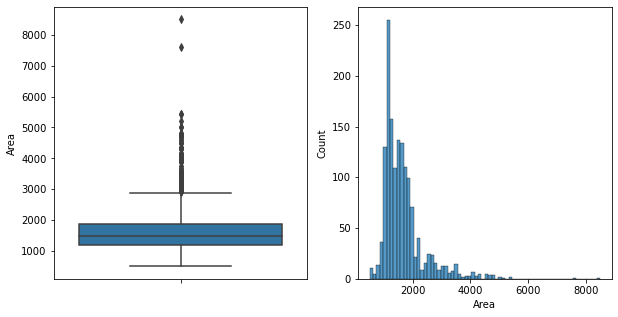

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Area', data= train_data)

plt.subplot(1, 2, 2)
_ = sns.histplot(x='Area', data=train_data)

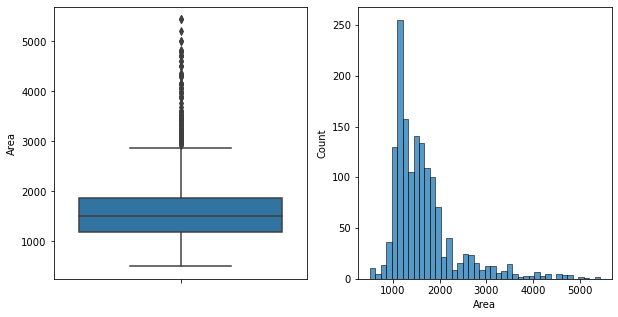

In [21]:
# Drop observations greater than some value
train_data = train_data[train_data['Area'] <= 6000]

### plot boxplot and histogram after any prices above 70000000
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Area', data= train_data)

plt.subplot(1, 2, 2)
_ = sns.histplot(x='Area', data= train_data)

### Adding two features longitude & latitude from location feature

In [22]:
location=Nominatim(user_agent="http")

def get_location_code(x):
    try:
        cordinates=location.geocode(x, country_codes='INR')
        return cordinates.latitude, cordinates.longitude  
    except:
        return "Not found", "Not found"
unique_location=train_data['Location'].unique()
location_to_code={}
for place in unique_location:
    location_to_code[place]=get_location_code(place) 
train_data['Latitude'],train_data['Longitude']=zip(*train_data['Location'].map(location_to_code))
train_data=train_data[train_data['Latitude']!='Not found'].reset_index(drop=True)


## Preprocessing Data

In [23]:
def preprocessing(df):
    
    # boxcox transformation for area feature
    #fitted_data1, fitted_lambda1 = stats.boxcox(df['Area'])
    
    # log transformation for area feature
    #fitted_data = stats.boxcox(df["Area"], lmbda=0)
    
    # minmax scaler for area feature
    scaler = MinMaxScaler()
    df['Area']=scaler.fit_transform(df["Area"].values.reshape(-1,1))

    # We will sum binary features into one feature to decrease the dimensionality of the data
    #df['FeaturesTotal']= df.iloc[:, 5:].sum(axis=1)
    
    # Adding new feature called luxury representing how luxurious is each house
    # If ANY of the indoor luxury features are available we assign 100
    df.loc[(df["WashingMachine"]==1)|(df["Gasconnection"]==1)|(df["AC"]==1)|(df["Wifi"]==1)|
           (df["LiftAvailable"]==1)|(df["BED"]==1)|(df["Microwave"]==1)|(df['TV']==1)|(df['DiningTable']==1)|(df["Sofa"]==1)|
           (df["Wardrobe"]==1)|(df["Refrigerator"]==1)|(df["MultipurposeRoom"]==1),"luxury"]=100
    
     # If ANY of the outdoor luxury features are available we assign 200
    df.loc[(df["VaastuCompliant"]==1)|(df["SwimmingPool"]==1)|(df["LandscapedGardens"]==1)|(df["Gymnasium"]==1)|
           (df["JoggingTrack"]==1)|(df["CarParking"]==1)|(df["MaintenanceStaff"]==1)|(df["GolfCourse"]==1)|
           (df["RainWaterHarvesting"]==1)|(df["IndoorGames"]==1)|(df["ShoppingMall"]==1)|(df["Intercom"]==1)|
           (df["SportsFacility"]==1)|(df["ATM"]==1)|(df["ClubHouse"]==1)|(df["School"]==1)|(df["24X7Security"]==1)|
           (df["PowerBackup"]==1)|(df["StaffQuarter"]==1)|(df["Cafeteria"]==1)|(df["Hospital"]==1)|
           (df["Children'splayarea"]==1),"luxury"]=200
    
    # If ALL the luxury features are available we assign 400
    df.loc[(df["WashingMachine"]==1)&(df["Gasconnection"]==1)&(df["AC"]==1)&(df["Wifi"]==1)&(df["Children'splayarea"]==1)&
           (df["LiftAvailable"]==1)&(df["BED"]==1)&(df["Microwave"]==1)&(df['TV']==1)&(df['DiningTable']==1)&(df["Sofa"]==1)&
           (df["Wardrobe"]==1)&(df["Refrigerator"]==1)&(df["VaastuCompliant"]==1)&(df["SwimmingPool"]==1)&
           (df["LandscapedGardens"]==1)&(df["Gymnasium"]==1)&(df["JoggingTrack"]==1)&(df["CarParking"]==1)&
           (df["MaintenanceStaff"]==1)&(df["GolfCourse"]==1)&(df["RainWaterHarvesting"]==1)&(df["IndoorGames"]==1)&
           (df["ShoppingMall"]==1)&(df["Intercom"]==1)&(df["SportsFacility"]==1)&(df["ATM"]==1)&(df["ClubHouse"]==1)&
           (df["School"]==1)&(df["24X7Security"]==1)&(df["PowerBackup"]==1)&(df["StaffQuarter"]==1)&(df["Cafeteria"]==1)&
           (df["MultipurposeRoom"]==1)&(df["Hospital"]==1),"luxury"]=400
    
    
    # If ALL the luxury features are not available we assign 0
    df.loc[(df["WashingMachine"]==0)&(df["Gasconnection"]==0)&(df["AC"]==0)&(df["Wifi"]==0)&(df["Children'splayarea"]==0)&
           (df["LiftAvailable"]==0)&(df["BED"]==0)&(df["Microwave"]==0)&(df['TV']==0)&(df['DiningTable']==0)&(df["Sofa"]==0)&
           (df["Wardrobe"]==0)&(df["Refrigerator"]==0)&(df["VaastuCompliant"]==0)&(df["SwimmingPool"]==0)&
           (df["LandscapedGardens"]==0)&(df["Gymnasium"]==0)&(df["JoggingTrack"]==0)&(df["CarParking"]==0)&
           (df["MaintenanceStaff"]==0)&(df["GolfCourse"]==0)&(df["RainWaterHarvesting"]==0)&(df["IndoorGames"]==0)&
           (df["ShoppingMall"]==0)&(df["Intercom"]==0)&(df["SportsFacility"]==0)&(df["ATM"]==0)&(df["ClubHouse"]==0)&
           (df["School"]==0)&(df["24X7Security"]==0)&(df["PowerBackup"]==0)&(df["StaffQuarter"]==0)&(df["Cafeteria"]==0)&
           (df["MultipurposeRoom"]==0)&(df["Hospital"]==0),"luxury"]=0
    
   
    #df.drop(df.iloc[:, 5:-4], inplace = True, axis = 1)
    df["luxury1"]=2*df["WashingMachine"]+2*df["Gasconnection"]+3*df["AC"]+2*df["Wifi"]+10*df["Children'splayarea"]+2*df["LiftAvailable"]+df["BED"]+2*df["Microwave"]+df['TV']+df['DiningTable']+df["Sofa"]+df["Wardrobe"]+df["Refrigerator"]+10*df["VaastuCompliant"]+10*df["SwimmingPool"]+10*df["LandscapedGardens"]+10*df["Gymnasium"]+df["JoggingTrack"]+10*df["CarParking"]+10*df["MaintenanceStaff"]+10*df["GolfCourse"]+10*df["RainWaterHarvesting"]+3*df["IndoorGames"]+10*df["ShoppingMall"]+3*df["Intercom"]+4*df["SportsFacility"]+10*df["ATM"]+4*df["ClubHouse"]+4*df["School"]+4*df["24X7Security"]+4*df["PowerBackup"]+10*df["StaffQuarter"]+2*df["Cafeteria"]+2*df["MultipurposeRoom"]+3*df["Hospital"]
    df = df.drop(["WashingMachine","Gasconnection","AC","Wifi","Children'splayarea","LiftAvailable","BED",
                  "Microwave",'TV','DiningTable',"Sofa","Wardrobe","Refrigerator","VaastuCompliant","SwimmingPool","LandscapedGardens","Gymnasium","JoggingTrack","CarParking","MaintenanceStaff","GolfCourse","RainWaterHarvesting","IndoorGames","ShoppingMall","Intercom","SportsFacility","ATM","ClubHouse","School","24X7Security","PowerBackup","StaffQuarter","Cafeteria","MultipurposeRoom","Hospital"], axis='columns')
    df.head()
    return df

In [24]:
train_data=preprocessing(train_data)
display(train_data.head(60))

,Price,Area,Location,No. of Bedrooms,Resale,Latitude,Longitude,luxury,luxury1
0,9500000,0.303644,Kukatpally,3,1,17.493084,78.405441,200.0,117
1,18000000,0.358300,Nanakramguda,3,0,17.425828,78.340552,200.0,97
2,14600000,0.284413,Nallakunta,3,0,17.3975,78.50557,200.0,9
3,8100000,0.200405,Narsingi,3,0,18.019101,78.069271,200.0,26
4,10700000,0.284413,Miyapur,3,0,17.498161,78.356763,200.0,47
5,4850000,0.111336,Ramachandra Puram,2,0,17.260178,79.539164,200.0,9
6,4050000,0.177126,Patancheru,2,0,17.528609,78.267425,0.0,0
7,2400000,0.008097,Amberpet,1,0,17.777683,78.570507,200.0,9
8,6583000,0.152632,Nagole,2,0,17.373995,78.558109,200.0,44
9,10000000,0.288462,Kukatpally,3,0,17.493084,78.405441,200.0,132


In [25]:
#avg_price_per_loc = train_data.groupby('Location').aggregate({"Price":np.mean}).round(0).astype(int)
#train_data['avg_price_per_loc'] = train_data['Location'].map(avg_price_per_loc['Price'])


### Spliting the data into train & validation sets

In [26]:
target=train_data["Price"]
train_data = train_data.drop(["Price"], axis='columns')
X_train,X_val,y_train,y_val=train_test_split(train_data,target,test_size=0.1,random_state=42)

y_train=y_train.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)
print(y_train.shape)


(1269, 1)


### Catboost Encoder for location feature

In [27]:

feature_train=list(X_train.columns)
feature_val=list(X_val.columns)
CBE_encoder = CatBoostEncoder()
train_cbe = CBE_encoder.fit_transform(X_train[feature_train], y_train)
val_cbe = CBE_encoder.transform(X_val[feature_val])



### StandardScaler for the three features "Location","Latitude","Longitude"

In [28]:
sc_X = StandardScaler()
train_cbe[['Location',"Latitude","Longitude"]]=sc_X.fit_transform(train_cbe[['Location',"Latitude","Longitude"]])
val_cbe[['Location',"Latitude","Longitude"]]=sc_X.fit_transform(val_cbe[['Location',"Latitude","Longitude"]])
#fitted_data, fitted_lambda = stats.boxcox(train_cbe['Location'])
#train_cbe['Location']=fitted_data
display(train_cbe.head())



,Area,Location,No. of Bedrooms,Resale,Latitude,Longitude,luxury,luxury1
706,0.121457,-0.049979,2,1,-0.045988,-0.045988,200.0,17
30,0.225911,-0.049979,3,1,-0.045988,-0.045988,200.0,101
244,0.182186,-0.049979,2,0,-0.045988,-0.045988,200.0,47
1142,0.133603,-0.049979,2,0,-0.045988,-0.045988,0.0,0
543,0.596761,-0.049979,4,0,-0.045988,-0.045988,200.0,81


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score

# Assign the data to predictor and outcome variables
poly_feat = PolynomialFeatures(degree = 2,interaction_only=True)
X_poly_train = poly_feat.fit_transform(train_cbe)
X_poly_val = poly_feat.fit_transform(val_cbe)


# Make and fit the polynomial regression model
# Create a LinearRegression object and fit it to the polynomial predictor features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
predicitons_val = poly_model.predict(X_poly_val)
print(predicitons_val.shape)
print(y_val.shape)
print("Poly reg val accuracy (deg=2): ", r2_score( y_val,predicitons_val))
predicitons_train = poly_model.predict(X_poly_train)
print("Poly reg Train accuracy (deg=2): ", r2_score( y_train,predicitons_train))


(142, 1)
(142, 1)
Poly reg val accuracy (deg=2):  0.8190230114432775
Poly reg Train accuracy (deg=2):  0.8770065882667907


In [30]:
linear_model = LinearRegression()
linear_model.fit(train_cbe, y_train)
predicitons_lin_train = linear_model.predict(train_cbe)
print("Multiple LR Train accuracy: ", r2_score( y_train,predicitons_lin_train))
predicitons_lin_val = linear_model.predict(val_cbe)
print("Multiple LR Val accuracy: ", r2_score( y_val,predicitons_lin_val))

Multiple LR Train accuracy:  0.8504842737456588
Multiple LR Val accuracy:  0.7859679974705049


In [31]:
# y =  np.array(train_data['Price'])
# X = np.array(train_data.drop(columns=['Price', 'Location']))
# #X = np.array(train_data[['Area', 'No. of Bedrooms', 'Resale']])  


# y_test =  np.array(test_data['Price'])
# X_test = np.array(test_data.drop(columns=['Price', 'Location']))
# #X_test = np.array(test_data[['Area', 'No. of Bedrooms', 'Resale']])  

# Test

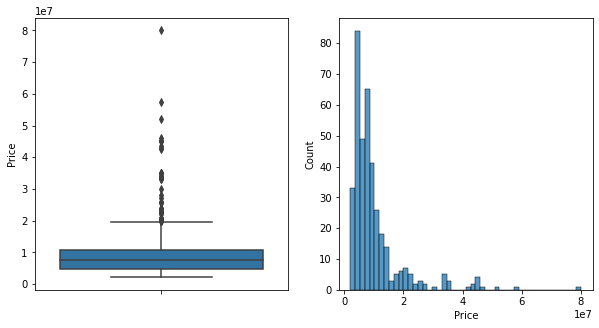

In [32]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Price', data= test_data)

plt.subplot(1, 2, 2)
_ = sns.histplot(x='Price', data=test_data)

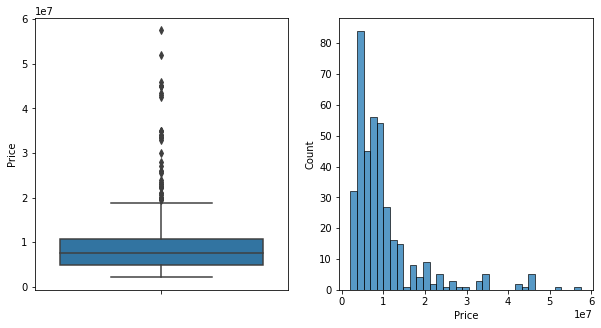

In [33]:
# Drop observations greater than some value
test_data = test_data[test_data['Price'] <= 0.66*1e8]

### plot boxplot and histogram after any prices above 70000000
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Price', data= test_data)

plt.subplot(1, 2, 2)
_ = sns.histplot(x='Price', data= test_data)

In [34]:
unique_location_test=test_data['Location'].unique()
location_to_code_test={}
for place in unique_location_test:
    location_to_code_test[place]=get_location_code(place) 
test_data['Latitude'],test_data['Longitude']=zip(*test_data['Location'].map(location_to_code_test))
test_data=test_data[test_data['Latitude']!='Not found'].reset_index(drop=True)


In [35]:
#test_data['avg_price_per_loc'] = test_data['Location'].map(avg_price_per_loc['Price'])


In [36]:
test_data=preprocessing(test_data)
display(test_data.head(60))

,Price,Area,Location,No. of Bedrooms,Resale,Latitude,Longitude,luxury,luxury1
0,8900000,0.217317,Kukatpally,2,0,17.493084,78.405441,200.0,96
1,10400000,0.376098,Manikonda,3,0,16.449897,80.83346,200.0,95
2,7875000,0.323171,Puppalaguda,3,0,17.399995,78.386169,200.0,87
3,4700000,0.148780,Santoshnagar,3,1,17.346719,78.508195,0.0,0
4,3500000,0.073171,Nizampet,2,0,17.515397,78.381716,200.0,15
5,14000000,0.319512,Nanakramguda,3,0,17.425828,78.340552,200.0,71
6,5600000,0.189024,Lakdikapul,3,1,17.404114,78.461165,200.0,6
7,20000000,0.597561,Dilsukh Nagar,4,1,17.369875,78.525382,100.0,2
8,5500000,0.256098,Mallapur,2,1,17.440537,78.578855,100.0,3
9,8200000,0.248780,Kondapur,3,0,18.33096,79.922469,0.0,0


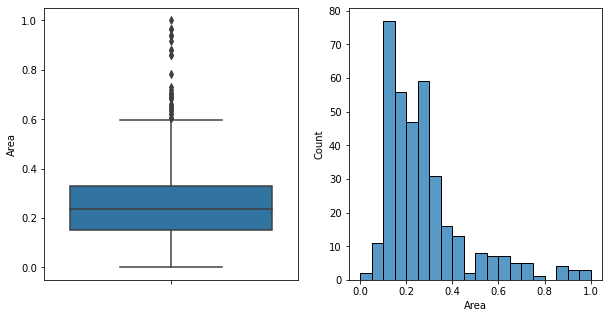

In [37]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Area', data= test_data)

plt.subplot(1, 2, 2)
_ = sns.histplot(x='Area', data=test_data)

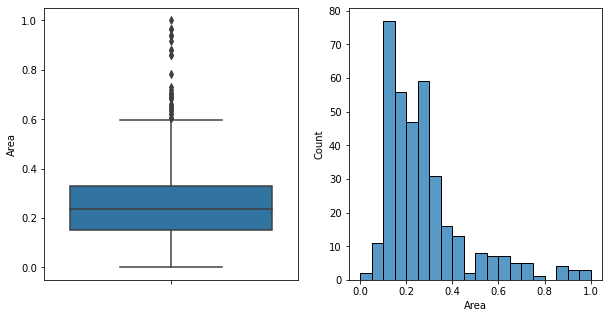

In [38]:
# Drop observations greater than some value
test_data = test_data[test_data['Area'] <= 6000]

### plot boxplot and histogram after any prices above 70000000
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Area', data= test_data)

plt.subplot(1, 2, 2)
_ = sns.histplot(x='Area', data= test_data)

In [39]:
target_test=test_data["Price"]
test_data = test_data.drop(["Price"], axis='columns')


In [40]:
feature_test=list(test_data.columns)
test_cbe = CBE_encoder.transform(test_data[feature_test])

In [41]:
test_cbe[['Location',"Latitude","Longitude"]]=sc_X.fit_transform(test_cbe[['Location',"Latitude","Longitude"]])

In [42]:
X_poly_test = poly_feat.fit_transform(test_cbe)
predicitons_test = poly_model.predict(X_poly_test)
print(predicitons_test.shape)
print(target_test.shape)
print("Poly reg test accuracy (deg=2): ", r2_score(target_test,predicitons_test))

(357, 1)
(357,)
Poly reg test accuracy (deg=2):  0.8059936971810229


In [43]:

predicitons_lin_test = linear_model.predict(test_cbe)
print("Multiple LR Test accuracy: ", r2_score( target_test,predicitons_lin_test))


Multiple LR Test accuracy:  0.7940700386244048
